In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sn

In [4]:
train = pd.read_csv("train.csv")

In [85]:
test = pd.read_csv("test.csv")

In [6]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [8]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
train.shape

(31647, 18)

In [14]:
test.shape

(13564, 17)

In [15]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<AxesSubplot:>

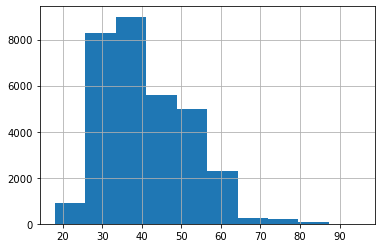

In [9]:
# Univariate analysis
train["age"].hist()

<AxesSubplot:>

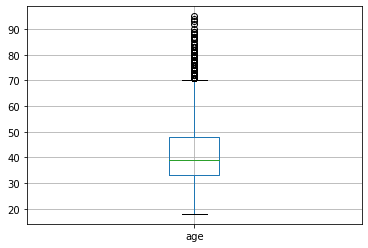

In [10]:
train.boxplot("age")

In [24]:
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

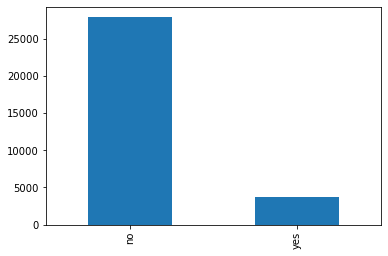

In [25]:
train["subscribed"].value_counts().plot.bar()

In [26]:
train["subscribed"].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:xlabel='subscribed,loan'>

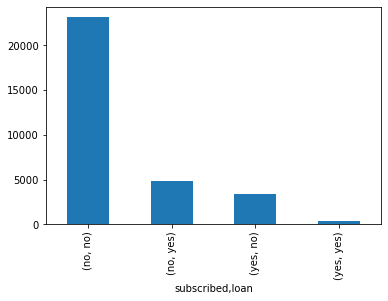

In [20]:
train[["subscribed","loan"]].value_counts().plot.bar()

In [21]:
train["poutcome"].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [22]:
train[["poutcome","subscribed"]].value_counts()

poutcome  subscribed
unknown   no            23556
failure   no             2931
unknown   yes            2373
other     no             1071
success   yes             694
failure   yes             431
success   no              374
other     yes             217
dtype: int64

<AxesSubplot:xlabel='poutcome,subscribed'>

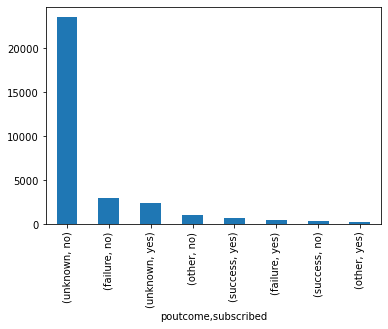

In [23]:
train[["poutcome","subscribed"]].value_counts().plot.bar()

In [28]:
train["job"].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

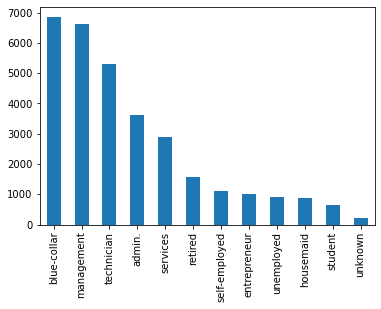

In [29]:
train["job"].value_counts().plot.bar()

In [34]:
train["default"].value_counts()

no     31062
yes      585
Name: default, dtype: int64

<AxesSubplot:>

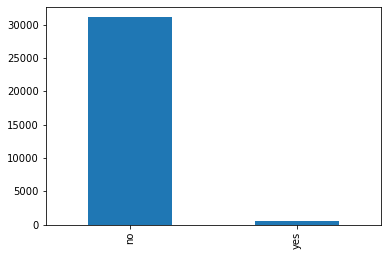

In [35]:
train["default"].value_counts().plot.bar()

In [36]:
#Bivariate analysis
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

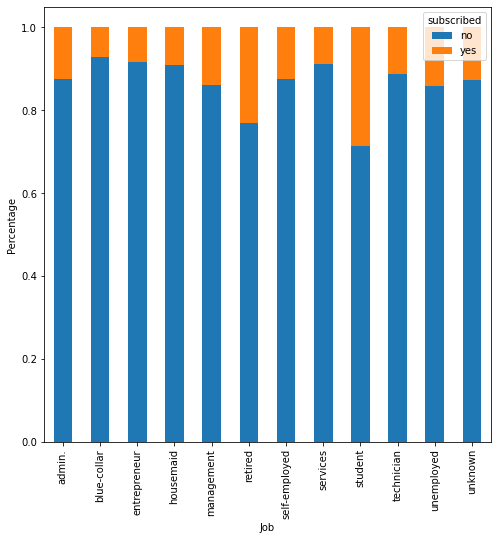

In [42]:
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

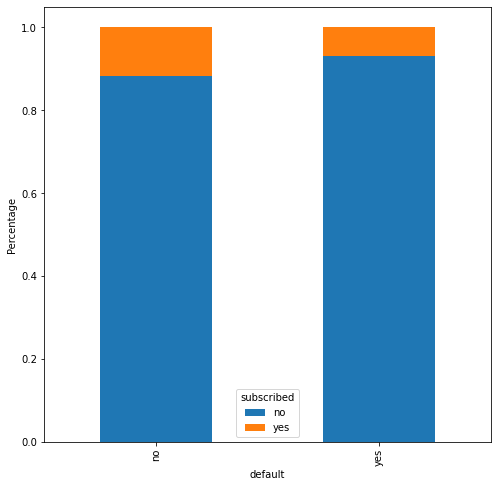

In [43]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [44]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

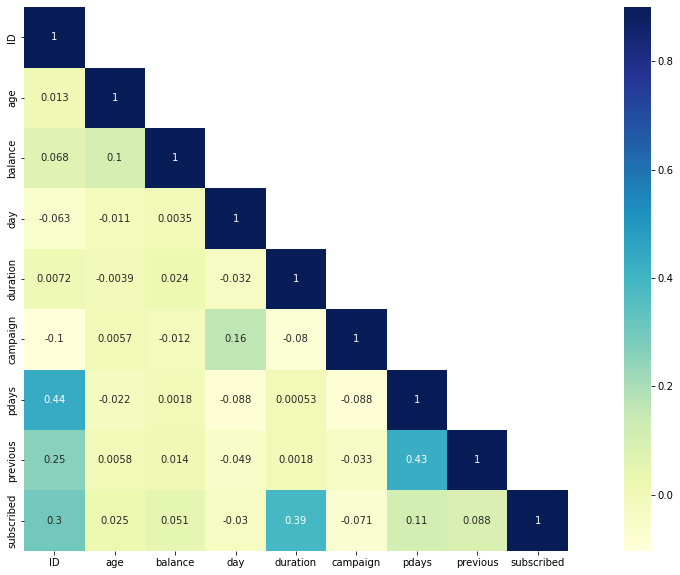

In [49]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [52]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [53]:
#classifiaction problem so logistic regression and decsion tree 

In [54]:
target = train["subscribed"]

In [55]:
train = train.drop("subscribed",1)

C:\Users\comp\AppData\Local\Temp/ipykernel_10296/4132561661.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop("subscribed",1)


In [56]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [57]:
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
train.shape

(31647, 52)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [61]:
# Builiding logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lreg = LogisticRegression()

In [65]:
lreg.fit(X_train,y_train)

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
prediction = lreg.predict(X_val)

In [68]:
# Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val,prediction)

0.8884676145339653

In [86]:
# test data
test = pd.get_dummies(test)
predict_test = lreg.predict(test)

In [87]:
predict_test = lreg.predict(test)

In [88]:
predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [122]:
clf = DecisionTreeClassifier(max_depth=5,random_state=0)

In [123]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [124]:
pred = clf.predict(X_val)

In [125]:
accuracy_score(y_val,pred)

0.9063191153238547

In [127]:
test_prediction = clf.predict(test)

In [128]:
submission = pd.DataFrame()

In [129]:
submission["ID"] = test["ID"]
submission["Subscribed"] = test_prediction

In [130]:
submission["Subscribed"].replace(0,"no",inplace=True)
submission["Subscribed"].replace(1,"Yes",inplace=True)

In [131]:
submission.to_csv("submission.csv",header=True,index=False)

In [133]:
test["subscribed"] = test_prediction

In [134]:
test.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'subscribed'],
      dtype='object')